## Importing the required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Reading the dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Dropping the insignificant column

In [4]:
df.drop('CustomerID', axis = 1, inplace = True) 


Dropping the column - Customer ID as it does not add any significance to the dataset. 


In [5]:
df.head(5) #Showing the first five rows

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Exploratory Data Analysis

### Shape of the dataset

In [6]:
df.shape

(200, 4)

The dataset has 200 rows and 4 columns. 

### Checking the data types of the columns

In [7]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Of the four columns in the dataset, the column - 'Gender' is of dtype: object. The remaining columns are of dtype: int64

### Statistical Summary

In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


The above table gives the statistical description of the dataset. 

## Data visualization

### Relationship between Age and Annual Income

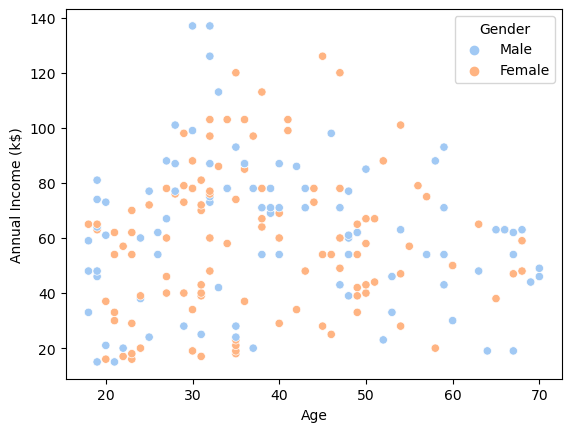

In [9]:
sns.scatterplot(x = df['Age'], y = (df['Annual Income (k$)']), hue = df['Gender'], palette = 'pastel' )
plt.show()

### Relationship between Age and Spending Score

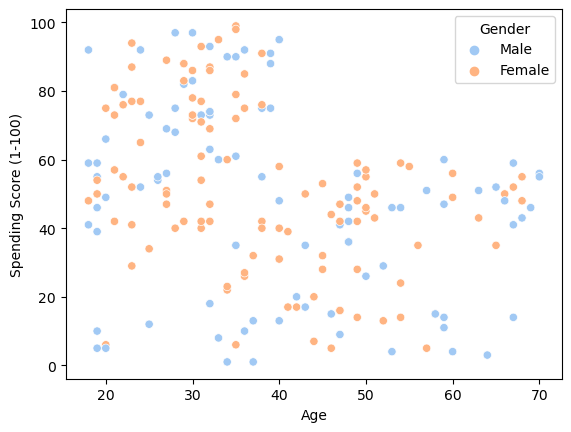

In [10]:
sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'], hue = df['Gender'], palette = 'pastel' )
plt.show()



### Relationship between Spending Score and Annual Income

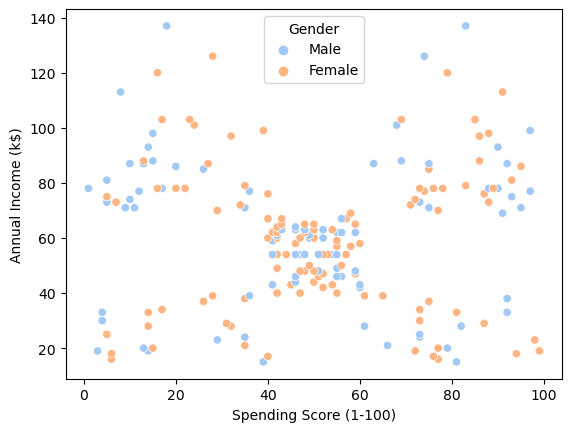

In [11]:
sns.scatterplot(x = df['Spending Score (1-100)'], y = (df['Annual Income (k$)']), hue = df['Gender'], palette = 'pastel' )

plt.show()



### Data Visualization to check for outliers

<AxesSubplot:>

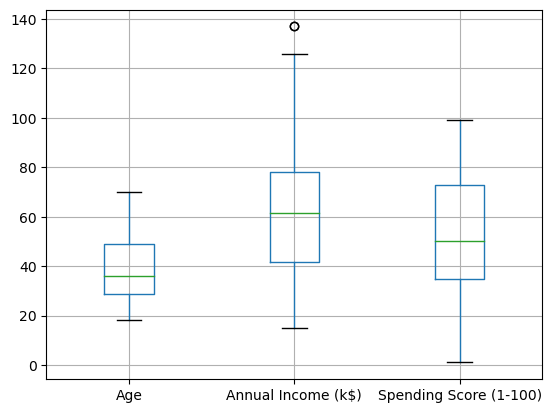

In [12]:
df.boxplot()

In [13]:
for i in df['Annual Income (k$)']:
    if i > 120:
        print(i)

126
126
137
137


There are only two outliers in the column - Annual Income (k$). Hence, no treatment of outliers is necessary. 

## Data Preprocessing

### Checking for null values

In [14]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

The dataset does not contain any null values. 

### Splitting the numerical data

In [15]:
num_df = df.select_dtypes(include = "number")
num_df.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Scaling the numerical columns using Standard Scaler 

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_sc = sc.fit_transform(num_df)
df_sc = pd.DataFrame(df_sc, columns=num_df.columns)

### Summary of the scaled data

In [17]:
df_sc.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


### Splitting the categorical data

In [18]:
cat_df = df.select_dtypes(include = 'object')

In [19]:
cat_df.value_counts()

Gender
Female    112
Male       88
dtype: int64

In [20]:
112/200*100

56.00000000000001

This store has more female buyers. About 56% of the consumers are women while the remaining 44% are men. 

### Adding the categorical column back to the dataframe

In [21]:
df_sc['Gender'] = cat_df['Gender']

In [22]:
df_sc

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,Male
1,-1.281035,-1.738999,1.195704,Male
2,-1.352802,-1.700830,-1.715913,Female
3,-1.137502,-1.700830,1.040418,Female
4,-0.563369,-1.662660,-0.395980,Female
...,...,...,...,...
195,-0.276302,2.268791,1.118061,Female
196,0.441365,2.497807,-0.861839,Female
197,-0.491602,2.497807,0.923953,Male
198,-0.491602,2.917671,-1.250054,Male


### Converting the dataframe into array

In [23]:
data_array = df_sc.values

In [89]:
#data_array

In [25]:
data_array.dtype

dtype('O')

### Data type conversion of the numerical input arrays 

In [26]:
data_array[:, 0] = data_array[:, 0].astype(float)
data_array[:, 1] = data_array[:, 1].astype(float)
data_array[:, 2] = data_array[:, 2].astype(float)
data_array[:, 3] = data_array[:, 3].astype(object)


In [90]:
#data_array

## Building the model using kprototypes - Unsupervised Learning implemented

### Importing the library

In [28]:
from kmodes.kprototypes import KPrototypes

In [29]:
#pip install kmodes

### Building the model

In [30]:
kproto = KPrototypes(n_clusters = 5, verbose = 2, max_iter = 20)

Initialization method and algorithm are deterministic. Setting n_init to 1.


### Initiating the clusters

In [31]:
clusters = kproto.fit_predict(data_array, categorical = [3])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 44, ncost: 244.23638566086746
Run: 1, iteration: 2/20, moves: 26, ncost: 216.99261471411143
Run: 1, iteration: 3/20, moves: 11, ncost: 209.98313138337173
Run: 1, iteration: 4/20, moves: 2, ncost: 209.76178846797768
Run: 1, iteration: 5/20, moves: 0, ncost: 209.76178846797768
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 47, ncost: 244.7674331702322
Run: 2, iteration: 2/20, moves: 16, ncost: 237.97418232647672
Run: 2, iteration: 3/20, moves: 15, ncost: 226.08697766907633
Run: 2, iteration: 4/20, moves: 12, ncost: 219.09899191442742
Run: 2, iteration: 5/20, moves: 8, ncost: 215.38837541376944
Run: 2, iteration: 6/20, moves: 7, ncost: 210.44232243378508
Run: 2, iteration: 7/20, moves: 2, ncost: 209.92918943313083
Run: 2, iteration: 8/20, moves: 1, ncost: 209.76178846797762
Run: 2, iteration: 9/20, moves: 0, ncost:

### Cluster centroids

In [32]:
kproto.cluster_centroids_

array([['-0.44191719296133986', '0.9915830476839198',
        '1.239502753794833', 'Female'],
       ['0.17329544771563263', '1.06645385105932', '-1.298010300496133',
        'Male'],
       ['-0.974395918453341', '-1.329545316496027', '1.1321778796599247',
        'Female'],
       ['-0.781722484663908', '-0.40306917205391607',
        '-0.2159139568083878', 'Female'],
       ['1.1986274532472045', '-0.4609814094179847',
        '-0.3270381821319671', 'Female']], dtype='<U32')

### Cluster labels

In [33]:
cluster_dic = []

for c in clusters:
    cluster_dic.append(c)

print(cluster_dic)

[3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 4, 2, 4, 2, 3, 2, 3, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 3, 4, 2, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 0, 3, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [34]:
len(cluster_dic)

200

### Adding the cluster labels to the dataframe

In [35]:
df_sc.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'], dtype='object')

In [36]:
df_sc['cluster'] = cluster_dic

In [37]:
df_sc.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender',
       'cluster'],
      dtype='object')

In [38]:
df_sc.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender,cluster
0,-1.424569,-1.738999,-0.434801,Male,3
1,-1.281035,-1.738999,1.195704,Male,2
2,-1.352802,-1.700830,-1.715913,Female,3
3,-1.137502,-1.700830,1.040418,Female,2
4,-0.563369,-1.662660,-0.395980,Female,3


In [39]:
df_sc.describe()

,Age,Annual Income (k$),Spending Score (1-100),cluster
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16,2.255000
std,1.002509e+00,1.002509e+00,1.002509e+00,1.513748
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,0.000000
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,1.000000
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,3.000000
75%,7.284319e-01,6.656748e-01,8.851316e-01,4.000000
max,2.235532e+00,2.917671e+00,1.894492e+00,4.000000


In [40]:
df_sc[df_sc['cluster'] == 0].head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender,cluster
123,0.010765,0.322150,1.583920,Male,0
125,-0.563369,0.360319,1.040418,Female,0
127,0.082532,0.398489,1.739206,Male,0
129,-0.061002,0.398489,0.962775,Male,0
131,0.010765,0.398489,0.962775,Male,0


In [41]:
df_sc[df_sc['cluster'] == 0].describe()

,Age,Annual Income (k$),Spending Score (1-100),cluster
count,39.000000,39.000000,39.000000,39.0
mean,-0.441917,0.991583,1.239503,0.0
std,0.267593,0.622638,0.363544,0.0
min,-0.850435,0.322150,0.496916,0.0
25%,-0.635135,0.570251,0.943364,0.0
50%,-0.491602,0.703844,1.273347,0.0
75%,-0.240418,1.314555,1.545098,0.0
max,0.082532,2.917671,1.816849,0.0


In [42]:
df_sc[df_sc['cluster'] == 1].head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender,cluster
126,0.297832,0.398489,-0.590088,Male,1
128,1.446099,0.398489,-1.521805,Male,1
130,0.584899,0.398489,-1.599448,Male,1
134,-1.352802,0.474828,-1.754735,Male,1
136,0.369598,0.474828,-1.677091,Female,1


In [43]:
df_sc[df_sc['cluster'] == 1].describe()

,Age,Annual Income (k$),Spending Score (1-100),cluster
count,34.000000,34.000000,34.000000,34.0
mean,0.173295,1.066454,-1.298010,1.0
std,0.772811,0.631065,0.383607,0.0
min,-1.424569,0.398489,-1.910021,1.0
25%,-0.312185,0.637048,-1.560627,1.0
50%,0.261948,0.951946,-1.347108,1.0
75%,0.584899,1.419521,-1.065652,1.0
max,1.446099,2.917671,-0.434801,1.0


In [44]:
df_sc[df_sc['cluster'] == 2].head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender,cluster
1,-1.281035,-1.738999,1.195704,Male,2
3,-1.137502,-1.700830,1.040418,Female,2
5,-1.209269,-1.662660,1.001596,Female,2
7,-1.137502,-1.624491,1.700384,Female,2
9,-0.635135,-1.586321,0.846310,Female,2


In [45]:
df_sc[df_sc['cluster'] == 2].describe()

,Age,Annual Income (k$),Spending Score (1-100),cluster
count,22.000000,22.000000,22.000000,22.0
mean,-0.974396,-1.329545,1.132178,2.0
std,0.377280,0.288818,0.407788,0.0
min,-1.496335,-1.738999,0.419273,2.0
25%,-1.263094,-1.576779,0.885132,2.0
50%,-1.101619,-1.376390,1.040418,2.0
75%,-0.653077,-1.080577,1.380106,2.0
max,-0.276302,-0.822933,1.894492,2.0


In [46]:
df_sc[df_sc['cluster'] == 3].head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender,cluster
0,-1.424569,-1.738999,-0.434801,Male,3
2,-1.352802,-1.700830,-1.715913,Female,3
4,-0.563369,-1.662660,-0.395980,Female,3
6,-0.276302,-1.624491,-1.715913,Female,3
14,-0.132768,-1.548152,-1.444162,Male,3


In [47]:
df_sc[df_sc['cluster'] == 3].head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender,cluster
0,-1.424569,-1.738999,-0.434801,Male,3
2,-1.352802,-1.700830,-1.715913,Female,3
4,-0.563369,-1.662660,-0.395980,Female,3
6,-0.276302,-1.624491,-1.715913,Female,3
14,-0.132768,-1.548152,-1.444162,Male,3


In [48]:
df_sc[df_sc['cluster'] == 4].describe()

,Age,Annual Income (k$),Spending Score (1-100),cluster
count,58.000000,58.000000,58.000000,58.0
mean,1.198627,-0.460981,-0.327038,4.0
std,0.597452,0.526627,0.607895,0.0
min,0.226065,-1.586321,-1.832378,4.0
25%,0.728432,-0.765679,-0.502739,4.0
50%,1.051382,-0.441239,-0.163051,4.0
75%,1.786991,-0.021375,0.069879,4.0
max,2.235532,0.703844,0.380451,4.0


Now the dataset is labelled. 

## Data Preprocessing for Supervised Learning 

### Encoding the categorical variable

In [49]:
edf = pd.get_dummies(df_sc, columns = ['Gender'], drop_first = True)

edf

,Age,Annual Income (k$),Spending Score (1-100),cluster,Gender_Male
0,-1.424569,-1.738999,-0.434801,3,1
1,-1.281035,-1.738999,1.195704,2,1
2,-1.352802,-1.700830,-1.715913,3,0
3,-1.137502,-1.700830,1.040418,2,0
4,-0.563369,-1.662660,-0.395980,3,0
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0,0
196,0.441365,2.497807,-0.861839,1,0
197,-0.491602,2.497807,0.923953,0,1
198,-0.491602,2.917671,-1.250054,1,1


### Defining the dependent and independent variables

In [50]:
x = edf.drop('cluster', axis = 1)

In [51]:
x.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


In [52]:
y = edf['cluster']

In [53]:
y

0      3
1      2
2      3
3      2
4      3
      ..
195    0
196    1
197    0
198    1
199    0
Name: cluster, Length: 200, dtype: int16

### Performing train test split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1,test_size=0.30)

print('training input sample',xtrain.shape)
print('training output label',ytrain.shape)

print('testing input sample',xtest.shape)
print('testing output label',ytest.shape)

training input sample (140, 4)
training output label (140,)
testing input sample (60, 4)
testing output label (60,)


In [56]:
ytest

58     3
40     4
34     4
102    4
184    1
198    1
95     3
4      3
29     2
168    1
171    0
18     4
11     2
89     4
110    4
118    4
159    0
35     2
136    1
59     4
51     3
16     3
44     4
94     3
31     2
162    1
38     3
28     3
193    0
27     2
47     3
165    0
194    1
177    0
176    1
97     3
174    1
73     4
69     3
172    1
108    4
107    4
189    0
14     3
56     4
19     2
114    3
39     2
185    0
124    3
98     4
123    0
119    4
53     4
33     2
179    0
181    0
106    4
199    0
138    1
Name: cluster, dtype: int16

## Building the model using Logistic Regression - Supervised Learning implemented

### Importing the required libraries

In [57]:
from sklearn.linear_model import LogisticRegression

### Building the Logistic Regression Model

In [58]:
log_reg = LogisticRegression(random_state = 2)

### Training the model

In [59]:
log_reg.fit(xtrain,ytrain)

LogisticRegression(random_state=2)

### Predicting the classes

In [60]:
ypre = log_reg.predict(xtest)

In [61]:
ypre

array([3, 4, 4, 4, 1, 1, 3, 3, 2, 1, 0, 4, 2, 4, 4, 4, 0, 2, 1, 4, 3, 3,
       4, 3, 2, 1, 3, 4, 0, 2, 3, 0, 1, 0, 1, 3, 1, 4, 3, 1, 4, 4, 0, 3,
       4, 2, 3, 2, 0, 3, 4, 0, 4, 4, 2, 0, 0, 4, 0, 1], dtype=int16)

### Performance Metrics

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#### Confusion Matrix

In [63]:
cm_logreg = confusion_matrix(ytest,ypre)
print("Confusion Matrix")
print(cm_logreg)

Confusion Matrix
[[11  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0 13  1]
 [ 0  0  0  0 17]]


#### Accuracy Score

In [64]:
acc_log_reg = accuracy_score(ytest,ypre)

In [65]:
print('Accuracy Score: ', acc_log_reg)

Accuracy Score:  0.9833333333333333


#### Classification Report

In [66]:
print("Classification Report")
print(classification_report(ytest,ypre))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       1.00      0.93      0.96        14
           4       0.94      1.00      0.97        17

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



## Building the model using Decision Tree - Supervised Learning implemented

### Importing the required libraries

In [67]:
from sklearn.tree import DecisionTreeClassifier

### Building the Decision Tree Model

In [68]:
DT = DecisionTreeClassifier(random_state = 2)

### Training the model

In [69]:
DT_Model = DT.fit(xtrain,ytrain)

### Predicting the classes

In [70]:
y_pred_DT = DT_Model.predict(xtest)

In [71]:
y_pred_DT

array([3, 4, 4, 4, 3, 1, 3, 3, 2, 1, 0, 4, 2, 4, 4, 4, 0, 2, 1, 4, 3, 3,
       4, 3, 2, 1, 3, 3, 0, 3, 3, 0, 1, 0, 1, 3, 1, 4, 3, 1, 4, 4, 0, 3,
       4, 2, 3, 2, 0, 3, 4, 0, 4, 4, 2, 0, 0, 4, 0, 1], dtype=int16)

### Performance Metrics

#### Confusion Matrix

In [72]:
print('Confusion Matrix')
cm_dt = confusion_matrix(ytest,y_pred_DT)
print(cm_dt)

Confusion Matrix
[[11  0  0  0  0]
 [ 0  9  0  1  0]
 [ 0  0  7  1  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 17]]


#### Accuracy Score

In [73]:
accuracy_score_DT = accuracy_score(ytest, y_pred_DT, normalize=True)
print("Accuracy Score: ", accuracy_score_DT)

Accuracy Score:  0.9666666666666667


#### Classification Report

In [74]:
print("Classification Report")
print(classification_report(ytest,y_pred_DT))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       1.00      0.88      0.93         8
           3       0.88      1.00      0.93        14
           4       1.00      1.00      1.00        17

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



#### Plotting the tree

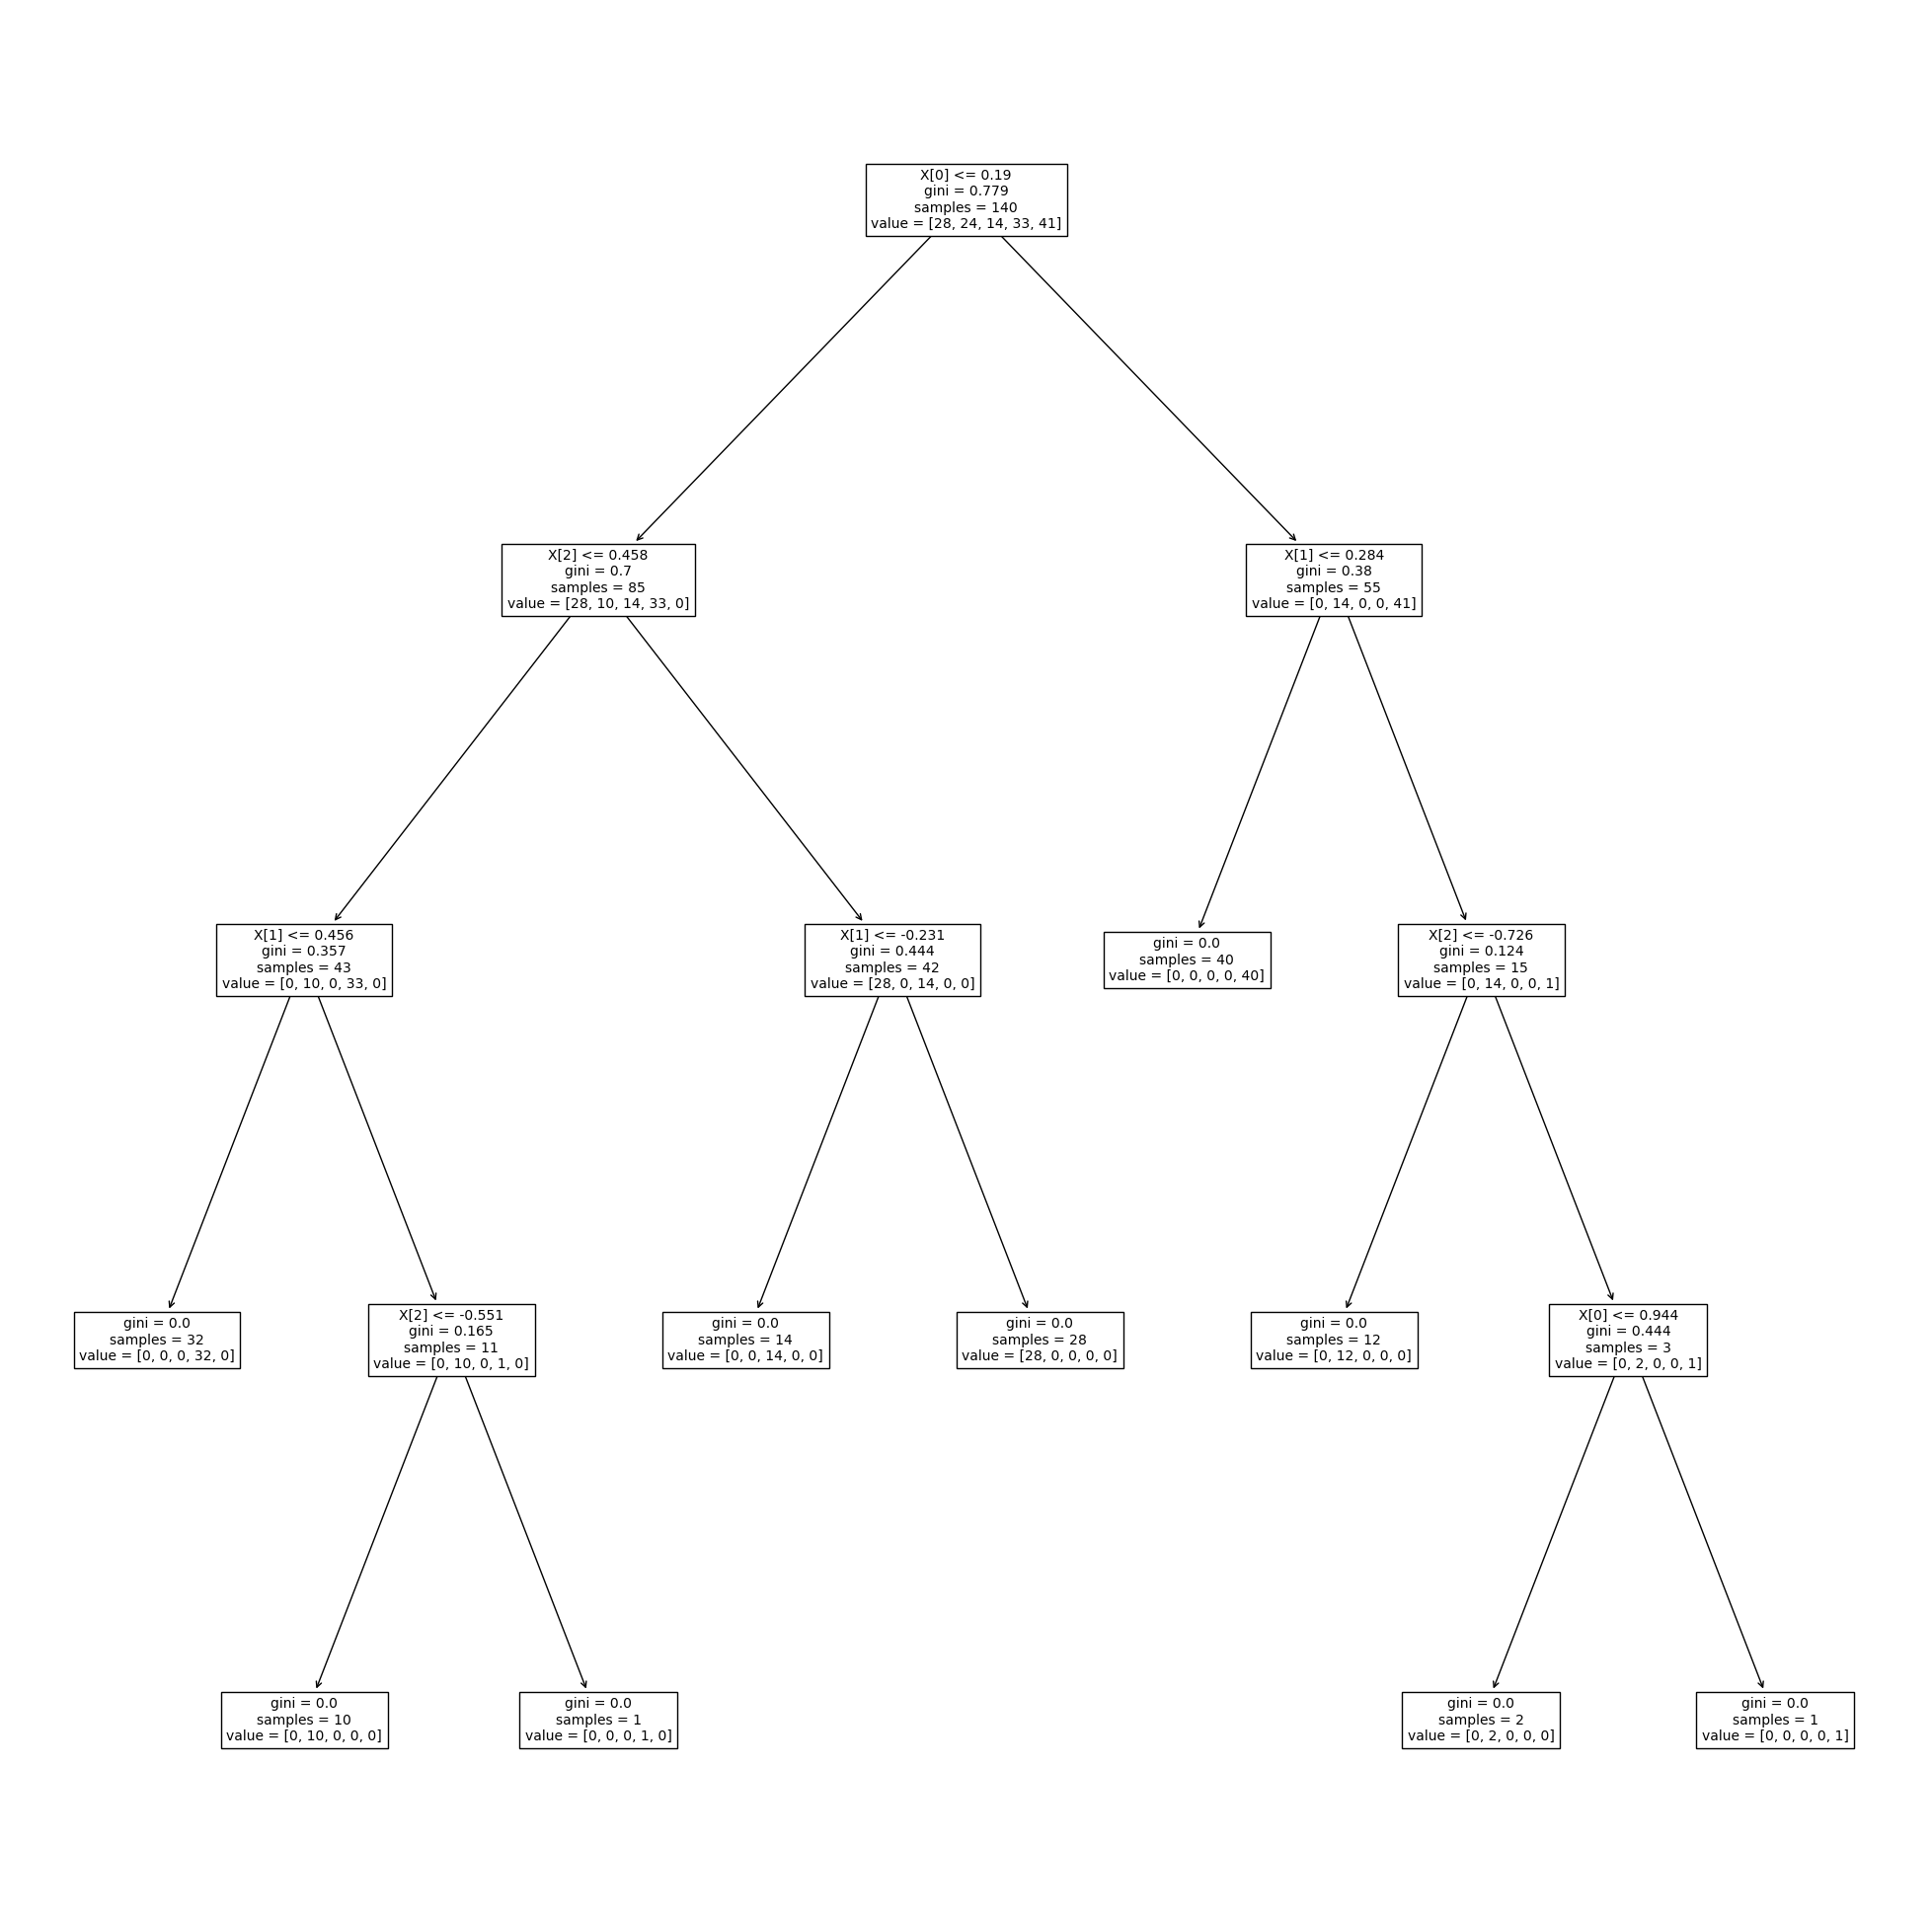

In [75]:
from sklearn import tree 
fig, ax = plt.subplots(figsize=(25, 25))
tree.plot_tree(DT_Model, fontsize=10)
plt.show()

## Building the model using Random Forest - Supervised Learning implemented

### Importing the required libraries

In [76]:
from sklearn.ensemble import RandomForestClassifier

### Building the Random Forest Model

In [77]:
RF = RandomForestClassifier(random_state = 2)

### Training the model

In [78]:
RF_model = RF.fit(xtrain,ytrain)

### Predicting the classes

In [79]:
y_pred_RF = RF_model.predict(xtest)

In [80]:
y_pred_RF

array([3, 4, 4, 4, 1, 1, 3, 3, 2, 1, 0, 4, 2, 4, 4, 4, 0, 2, 1, 4, 3, 3,
       4, 3, 2, 1, 3, 3, 0, 3, 3, 0, 1, 0, 1, 3, 1, 4, 3, 1, 4, 4, 0, 3,
       4, 2, 3, 2, 0, 3, 4, 0, 4, 4, 2, 0, 0, 4, 0, 1], dtype=int16)

### Performance Metrics

#### Confusion Matrix

In [81]:
cm_rf = confusion_matrix(ytest,y_pred_RF)
print("Confusion Matrix")
print(cm_rf)

Confusion Matrix
[[11  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  7  1  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 17]]


#### Accuracy Score

In [82]:
accuracy_score_RF = accuracy_score(ytest,y_pred_RF)
print("Accuracy Score: ", accuracy_score_RF)

Accuracy Score:  0.9833333333333333


#### Classification Report

In [83]:
print("Classification Report")
print(classification_report(ytest,y_pred_RF))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      0.88      0.93         8
           3       0.93      1.00      0.97        14
           4       1.00      1.00      1.00        17

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



## Comparing the Accuracy Scores

In [84]:
#d = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'], 'Accuracy': [acc_log_reg, accuracy_score_DT, accuracy_score_RF], index=[2, 3])}
#pd.DataFrame(data=d, index=[0, 1, 2])

acc = pd.DataFrame()

In [85]:
acc['Model'] = ['Logistic Regression', 'Decision Tree', 'Random Forest']

In [86]:
acc['Accuracy'] = [acc_log_reg, accuracy_score_DT, accuracy_score_RF]

In [87]:
acc

,Model,Accuracy
0,Logistic Regression,0.983333
1,Decision Tree,0.966667
2,Random Forest,0.983333


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

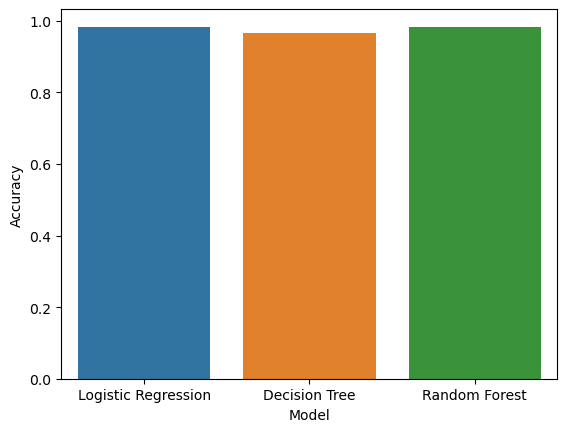

In [88]:
sns.barplot(x = acc['Model'], y = acc['Accuracy'])

From this bar chart, we can identify the model that performs the best for the given dataset. The best model can be finalized with the client for further predictions. 